In [141]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from typing import Tuple

# Price augmentation

Note : 75cl bottles are excluded from comparison


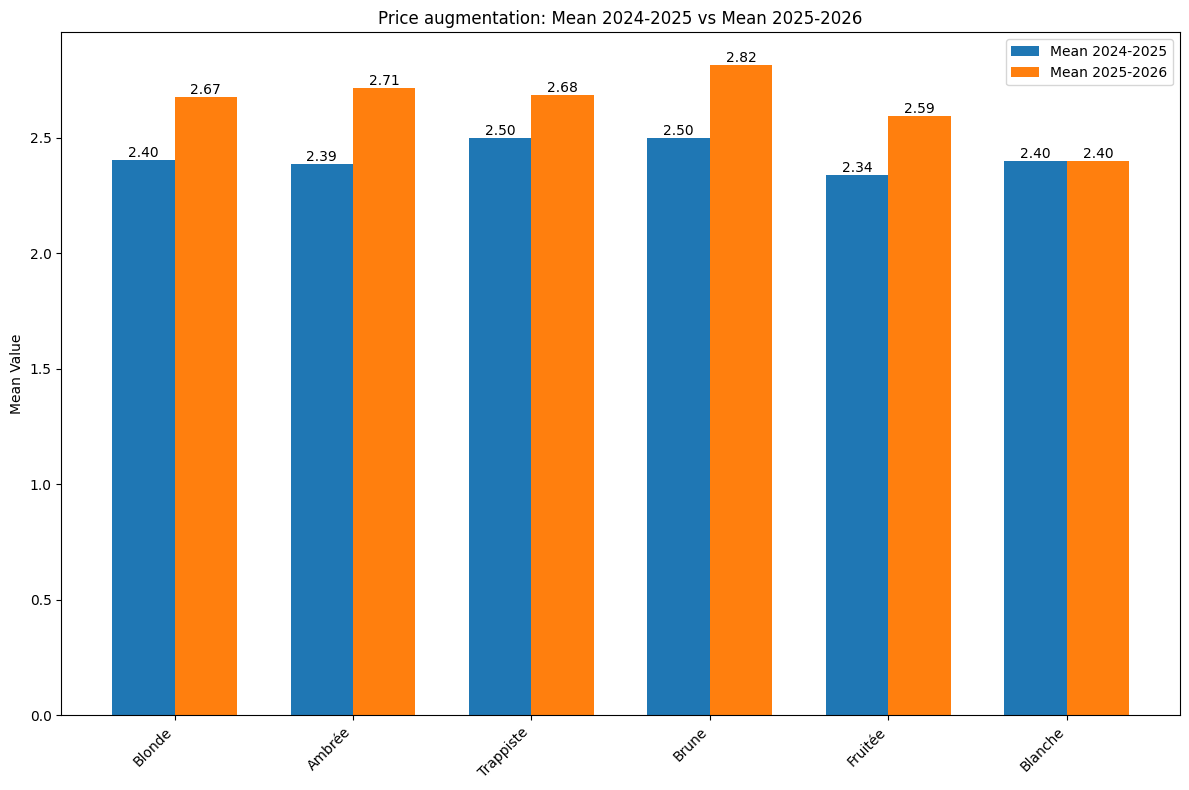

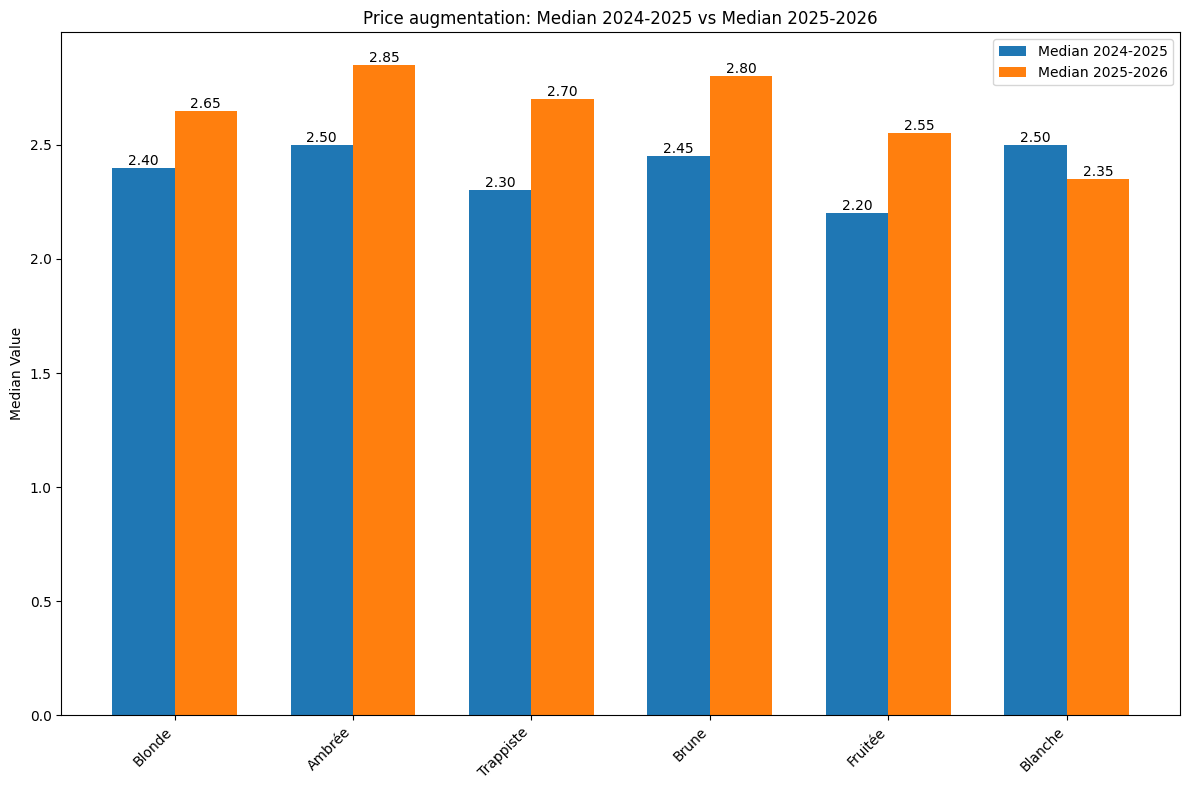

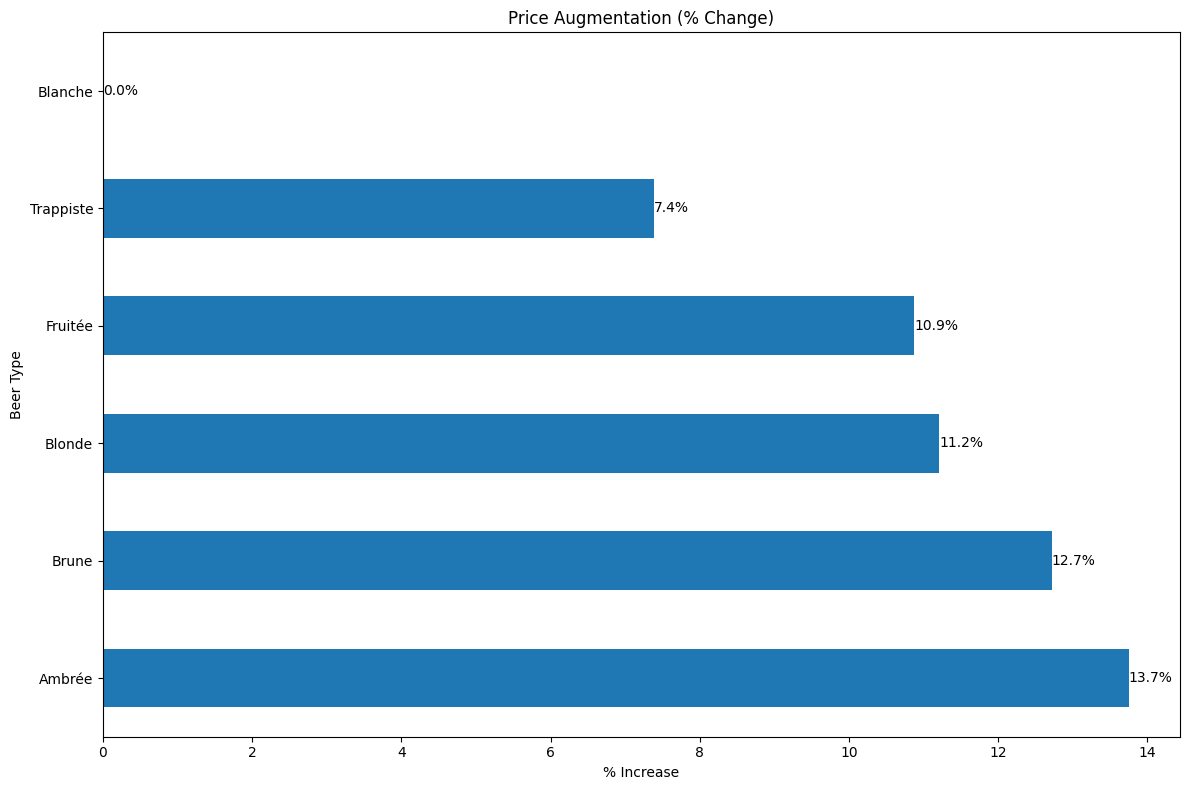

In [163]:
def get_mean_and_median(df: pd.DataFrame, beer_type: str) -> np.float64:
    copy = df.copy()
    copy = copy[copy["Type"] == beer_type]
    return np.mean(copy["Price"]), np.median(copy["Price"])


def compare_plot(df: pd.DataFrame) -> Tuple[plt.Figure, plt.Axes]:
    fig, ax = plt.subplots(figsize=(12, 8))
    c1, c2 = df.columns
    x = np.arange(len(df.index))

    bar1 = ax.bar(x_indices - width/2, df[c1], width, label=c1)
    bar2 = ax.bar(x_indices + width/2, df[c2], width, label=c2)

    ax.set_xticks(x_indices)
    ax.set_xticklabels(df.index)
    ax.legend()

    ax.bar_label(bar1, fmt='%.2f')
    ax.bar_label(bar2, fmt='%.2f')
    plt.xticks(rotation=45, ha='right')
    
    return fig, ax


df_2024 = pd.read_csv("../csv/2024-2025-Q1/ranker.csv", usecols=["Price", "Volume", "Type"])
df_2024 = df_2024[df_2024["Volume"] < 75]
df_current = pd.read_csv("../csv/2025-2026-Q1/ranker.csv", usecols=["Price", "Volume", "Type"])
df_current = df_current[df_current["Volume"] < 75]
print("Note : 75cl bottles are excluded from comparison")

types = pd.unique(df_current["Type"])

beers_stats = {}
for t in types:
    mean_2024, median_2024 = get_mean_and_median(df_2024, t)
    mean_current, median_current = get_mean_and_median(df_current, t)
    beers_stats[t] = {
        "Mean 2024-2025": mean_2024,
        "Mean 2025-2026": mean_current,
        "Median 2024-2025": median_2024,
        "Median 2025-2026": median_current
        }


df = pd.DataFrame(beers_stats).T


fig, ax = compare_plot(df[['Mean 2024-2025', 'Mean 2025-2026']])

ax.set_ylabel('Mean Value')
ax.set_title('Price augmentation: Mean 2024-2025 vs Mean 2025-2026')

plt.tight_layout()

fig, ax = compare_plot(df[['Median 2024-2025', 'Median 2025-2026']])

ax.set_ylabel('Median Value')
ax.set_title('Price augmentation: Median 2024-2025 vs Median 2025-2026')

plt.tight_layout()

df['Mean change'] = ((df['Mean 2025-2026'] - df['Mean 2024-2025']) / df['Mean 2024-2025']) * 100
df['Median change'] = ((df['Median 2025-2026'] - df['Median 2024-2025']) / df['Median 2024-2025']) * 100

df= df.sort_values('Mean change', ascending=False)

fig, ax = plt.subplots(figsize=(12, 8))
df['Mean change'].plot(
    kind='barh', 
    ax=ax, 
    title='Price Augmentation (% Change)',
    color='C0'
)
ax.set_xlabel('% Increase')
ax.set_ylabel('Beer Type')

ax.bar_label(ax.containers[0], fmt='%.1f%%')

plt.tight_layout()